In [39]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from utils.kde import smooth

%matplotlib inline

In [3]:
phantom_j = pd.read_excel("clinic_data/201903190320_IJV.xlsx", sheet_name="phantom_j")
phantom_t = pd.read_excel("clinic_data/201903190320_IJV.xlsx", sheet_name="phantom_t")
johnson = pd.read_excel("clinic_data/201903190320_IJV.xlsx", sheet_name="johnson")
toast = pd.read_excel("clinic_data/201903190320_IJV.xlsx", sheet_name="toast")


In [24]:
phantom_j.to_csv("clinic_data/20190319_phantom.csv", index=None)
phantom_t.to_csv("clinic_data/20190320_phantom.csv", index=None)
johnson.to_csv("clinic_data/20190319_johnson.csv", index=None)
toast.to_csv("clinic_data/20190320_toast.csv", index=None)

In [9]:
sys.getsizeof(phantom_t)
sys.getsizeof(johnson)/1024


162.6015625

In [10]:
phantom_j.head()

,wavelength,PC,PH,PI,PK
0,538.2643,18.4,16.2,18.2,26.0
1,538.6086,13.6,11.4,18.4,32.6
2,538.9529,12.4,11.6,13.0,27.0
3,539.2972,12.6,16.4,14.6,29.2
4,539.6415,11.0,13.0,16.0,28.0


In [11]:
toast.head()

,wavelength,max_mul_1,min_mul_1,max_sin_1,min_sin_1,max_mul_2,min_mul_2,max_sin_2,min_sin_2,max_mul_3,min_mul_3,max_sin_3,min_sin_3
0,538.2643,25.622222,25.715789,23.4,24.4,25.576471,25.155102,20.4,24.4,26.443478,26.04,27.4,25.4
1,538.6086,27.450000,28.752632,29.2,21.2,28.631373,28.383673,30.2,34.2,27.982609,28.56,31.2,21.2
2,538.9529,23.644444,24.094737,19.2,21.2,23.082353,23.363265,19.2,24.2,23.852174,24.48,26.2,27.2
3,539.2972,25.344444,24.768421,23.4,24.4,23.772549,24.277551,28.4,31.4,25.008696,24.24,26.4,29.4
4,539.6415,23.983333,24.715789,22.4,21.4,25.066667,25.053061,26.4,28.4,25.878261,24.56,15.4,26.4


In [14]:
toast.describe()

,wavelength,max_mul_1,min_mul_1,max_sin_1,min_sin_1,max_mul_2,min_mul_2,max_sin_2,min_sin_2,max_mul_3,min_mul_3,max_sin_3,min_sin_3
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,813.532150,1971.517726,1989.157549,1998.825000,2024.699375,1960.466360,1979.610344,1935.236250,1997.080000,1979.662283,1997.622100,1984.776875,2012.113750
std,159.075046,2089.335014,2109.072280,2120.736737,2148.804684,2077.703941,2098.990784,2049.905142,2114.014985,2090.299467,2110.242755,2097.097214,2126.408556
min,538.264300,20.844444,20.984211,16.000000,11.600000,21.341176,20.902041,12.400000,17.000000,21.547826,21.200000,15.400000,14.800000
25%,675.898225,100.823611,100.205263,99.400000,101.050000,100.970588,100.317347,101.550000,101.400000,99.673913,99.790000,100.150000,102.150000
50%,813.532150,990.686111,996.389474,999.700000,1020.000000,985.241176,991.336735,978.900000,1010.900000,1009.965217,1023.120000,1007.900000,1035.500000
75%,951.166075,4090.308333,4138.476316,4155.300000,4201.800000,4072.660784,4124.582653,4039.950000,4134.100000,4090.671739,4131.820000,4097.450000,4170.200000
max,1088.800000,6010.711111,6059.805263,6139.000000,6222.200000,5984.235294,6034.387755,5949.000000,6110.000000,5972.426087,6025.880000,5982.600000,6097.000000


<Figure size 720x432 with 0 Axes>

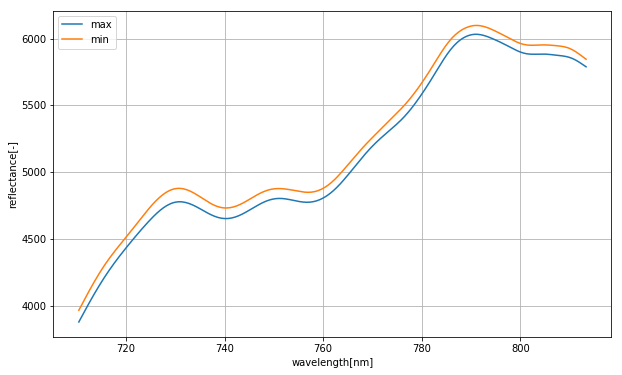

In [48]:
plt.figure(figsize=(10, 6))
mode = "sin"
# plt.plot(toast["wavelength"], toast["max_%s_1" % mode], label="max")
# plt.plot(toast["wavelength"], toast["min_%s_1" % mode], label="min")
# plt.grid()
# plt.legend()
# plt.xlabel("wavelength[nm]")
# plt.ylabel("reflectance[-]")
# plt.show()
f = 500
t = 800
plt.figure(figsize=(10, 6))
plt.plot(toast["wavelength"][f:t], smooth(toast["max_%s_1" % mode], band_width=8)[f:t], label="max")
plt.plot(toast["wavelength"][f:t], smooth(toast["min_%s_1" % mode], band_width=8)[f:t], label="min")
plt.grid()
plt.legend()
plt.xlabel("wavelength[nm]")
plt.ylabel("reflectance[-]")
plt.show()

# plt.plot(toast["wavelength"], toast["min_%s_1" % mode]/toast["max_%s_1" % mode], label="ratio")
# plt.grid()
# plt.legend()
# plt.xlabel("wavelength[nm]")
# plt.ylabel("reflectance[-]")
# plt.show()
# fig, ax = plt.subplots(2, 1, figsize=(10, 6))
# ax[0].plot(toast["wavelength"], toast["max_%s_1" % mode], label="max")
# ax[1].plot(toast["wavelength"], toast["min_%s_1" % mode], label="max")
# for a in ax:
#     a.grid()
#     a.legend()
# plt.xlabel("wavelength[nm]")
# plt.ylabel("reflectance[-]")

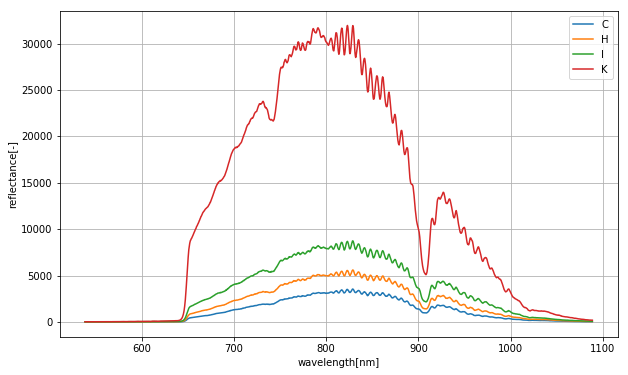

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(phantom_t["wavelength"], phantom_t["PC"], label="C")
plt.plot(phantom_t["wavelength"], phantom_t["PH"], label="H")
plt.plot(phantom_t["wavelength"], phantom_t["PI"], label="I")
plt.plot(phantom_t["wavelength"], phantom_t["PK"], label="K")

plt.xlabel("wavelength[nm]")
plt.ylabel("reflectance[-]")

plt.grid()
plt.legend()
plt.show()

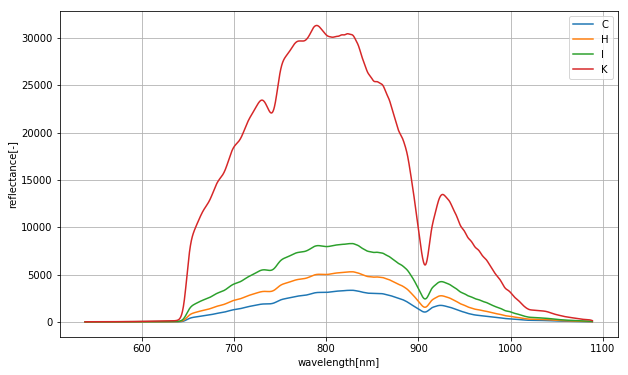

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(phantom_t["wavelength"], smooth(phantom_t["PC"], band_width=8), label="C")
plt.plot(phantom_t["wavelength"], smooth(phantom_t["PH"], band_width=8), label="H")
plt.plot(phantom_t["wavelength"], smooth(phantom_t["PI"], band_width=8), label="I")
plt.plot(phantom_t["wavelength"], smooth(phantom_t["PK"], band_width=8), label="K")

plt.xlabel("wavelength[nm]")
plt.ylabel("reflectance[-]")

plt.grid()
plt.legend()
plt.show()

In [89]:
import cv2
from copy import copy

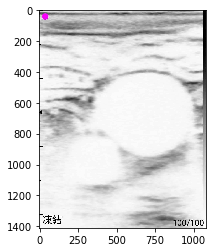

In [137]:
img = cv2.imread("example.jpg")
img = 255 - img
plt.imshow(img)

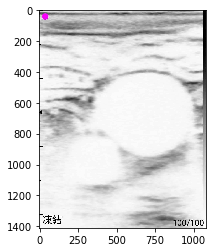

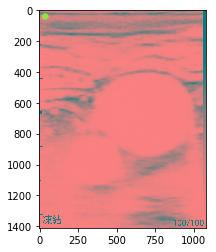

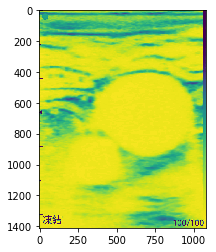

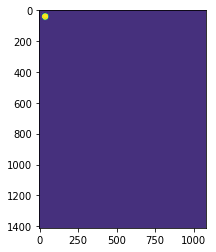

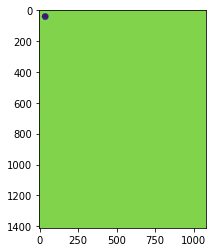

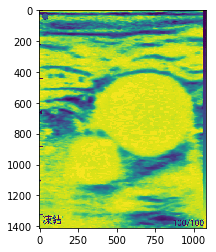

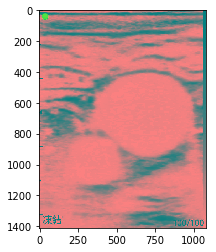

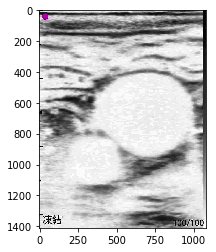

In [138]:
#-----Reading the image-----------------------------------------------------
plt.imshow(img) 
plt.show()
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow(l)
plt.show()
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl)
plt.show()

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow(limg)
plt.show()

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final)
plt.show()


(1411, 1080)

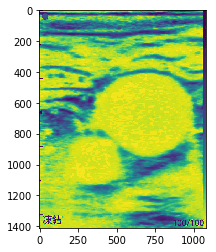

In [139]:
img = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
img.shape

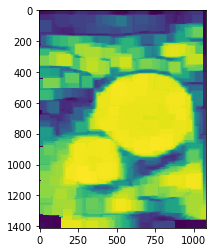

In [140]:
kernel = np.ones((5,5),np.uint8)
img_ = copy(img)
for i in range(10):
    img_ = cv2.erode(img_, kernel, iterations=15)
    img_ = cv2.dilate(img_, kernel, iterations=15)
plt.imshow(img_)

In [141]:
circles = cv2.HoughCircles(img_, cv2.HOUGH_GRADIENT, 1.2, 100)
print(circles.shape)
for i in circles[0,:3]:
    # draw the outer circle
    cv2.circle(img_, (i[0],i[1]), i[2], (0, 0, 0), 15)
    # draw the center of the circle
#     cv2.circle(img_,(i[0],i[1]),2,(0,0,255),3)

(1, 1, 3)


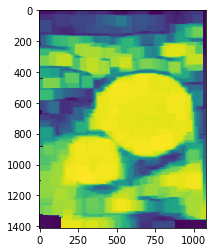

In [134]:
plt.imshow(img_)

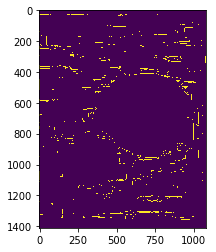

In [147]:
edges = cv2.Canny(img_,40,50)
plt.imshow(edges)